# Prerequisites 
* Files ../../datasets/V1LGN_spks_CQuinn_(pre/post/novel).feather -- can be generated using notebook (`preprocessing-notebooks/Explorating data + preprocessing .ipynb`)
* DI analysis on the dataset V1LGN -- pre/post/novel 

In [1]:
import glob 
import sys 
import os 
import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib
import pandas as pd 


sys.path.append('../notebooks/lasso-method/')
sys.path.append('../code/')
sys.path.append('./')
from utils import * 

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


os.makedirs('output', exist_ok=True)

## V1LGN

In [2]:
import pandas as pd 


pre, post, novel = ( pd.read_feather('../../datasets/V1LGN_spks_CQuinn_pre.feather'), 
                   pd.read_feather('../../datasets/V1LGN_spks_CQuinn_post.feather'),
                   pd.read_feather('../../datasets/V1LGN_spks_CQuinn_novel.feather'),) 

pre_units, post_units, novel_units = pre['id'].unique(), post['id'].unique(), novel['id'].unique()
len(pre_units), len(post_units), len(novel_units)

(130, 206, 206)

In [3]:
pre_files = glob.glob('../../V1LGN/output__stimuli_0/DI_values/V1LGN_spks_CQuinn_pre/0/500_1500/lasso_0.5/*')
post_files = glob.glob('../../V1LGN/output__stimuli_0/DI_values/V1LGN_spks_CQuinn_post/0/500_1500/lasso_0.5/*')
novel_files = glob.glob('../../V1LGN/output__stimuli_0/DI_values/V1LGN_spks_CQuinn_novel/0/500_1500/lasso_0.5/*')

len(pre_files), len(post_files), len(novel_files)

(130, 206, 206)

Issues summary {'negative_di': 20, 'n_areas': 0, 'zero_contrib': 0, 'low_firing_rates': 0}
Issues summary {'negative_di': 67, 'n_areas': 0, 'zero_contrib': 0, 'low_firing_rates': 0}
Issues summary {'negative_di': 20, 'n_areas': 0, 'zero_contrib': 0, 'low_firing_rates': 0}
Issues summary {'negative_di': 67, 'n_areas': 0, 'zero_contrib': 0, 'low_firing_rates': 0}
Issues summary {'negative_di': 20, 'n_areas': 0, 'zero_contrib': 0, 'low_firing_rates': 0}
Issues summary {'negative_di': 67, 'n_areas': 0, 'zero_contrib': 0, 'low_firing_rates': 0}
Issues summary {'negative_di': 20, 'n_areas': 0, 'zero_contrib': 0, 'low_firing_rates': 0}
Issues summary {'negative_di': 67, 'n_areas': 0, 'zero_contrib': 0, 'low_firing_rates': 0}
pre 28 LGN LGN
pre 48 LGN V1
pre 23 V1 LGN
pre 72 V1 V1
post 30 LGN LGN
post 51 LGN V1
post 20 V1 LGN
post 101 V1 V1

From LGN to LGN

From LGN to V1

From V1 to LGN

From V1 to V1

From LGN to LGN

From LGN to V1

From V1 to LGN

From V1 to V1


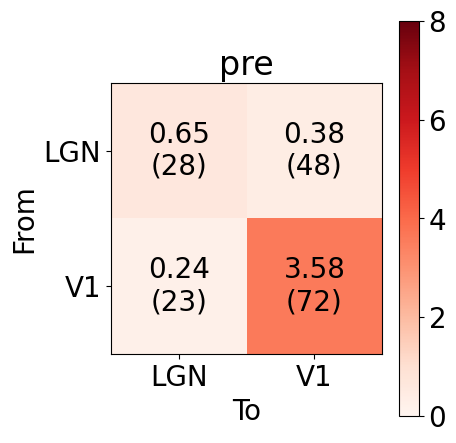

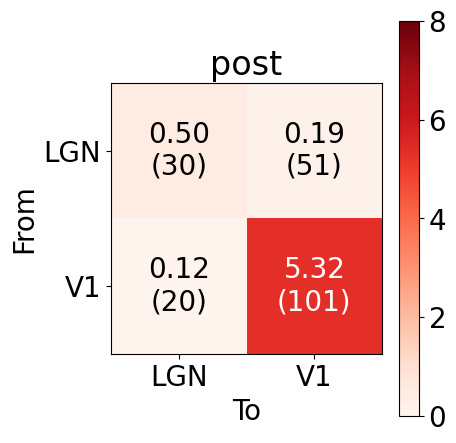

In [4]:

import analysis_utils
from all_stimuli_plots import read_plot_data

AREAS = ['LGN', 'V1']
STIMULI = [0]
STIMULUS_ID = 0
data = read_plot_data('', pre_files,post_files, areas=AREAS, stimuli=STIMULI)

for pre_post in ['pre', 'post']:
    for a1 in AREAS:
        for a2 in AREAS:
            print(pre_post, len(data['raw'][a1][a2][pre_post][STIMULUS_ID]), a1, a2)



plot_per_training(data, 'pre', training='pre', areas=AREAS, stimulus_id=0)
plt.tight_layout()
plt.savefig('output/V1LGN_pre.pdf', dpi=300)

plt.figure()

plot_per_training(data, 'post', training='post', areas=AREAS, stimulus_id=0)
plt.tight_layout()
plt.savefig('output/V1LGN_post.pdf', dpi=300)



From LGN to LGN
true_diff  [[-0.14928972]]
Proportion |Pre| / (|Pre| + |Post|) 0.4827586206896552
Using 1000000 runs

From LGN to V1
true_diff  [[-0.18830289]]
Proportion |Pre| / (|Pre| + |Post|) 0.48484848484848486
Using 1000000 runs
Significant - pre - 48, post - 51 with significance value 0.044053

From V1 to LGN
true_diff  [[-0.12027997]]
Proportion |Pre| / (|Pre| + |Post|) 0.5348837209302325
Using 1000000 runs

From V1 to V1
true_diff  [[1.74539184]]
Proportion |Pre| / (|Pre| + |Post|) 0.4161849710982659
Using 1000000 runs
Significant - pre - 72, post - 101 with significance value 0.005951
pvals [0.5629   0.088106 0.5629   0.023804]


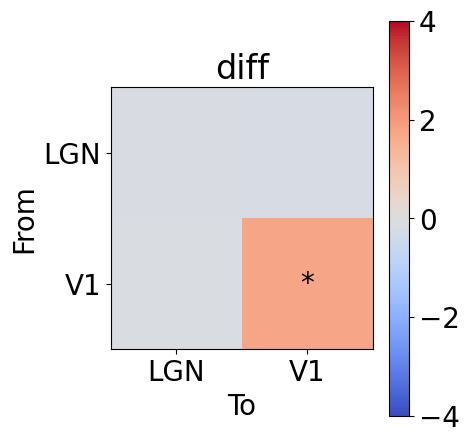

In [5]:
plot(data, 'diff', corrected=True, areas=AREAS, stimulus_id=0, max_=4., n_runs=1_000_000)
plt.tight_layout()
# plt.savefig('output/V1LGN_pre_post_diff.pdf', dpi=300)